# Data Science Project: Planning Stage (Individual)

Olivia Liang

---

## 1. Data Description

The dataset comes from a Minecraft research server operated by the UBC Computer Science research group. It is designed to record how players interact with the game over time. Two related files are provided:

"players.csv", which records demographic and gameplay characteristics for each unique player  
"session.csv", which logs each player's individual play sessions  

The players dataset includes seven variables:  
- "experience": categorical, player skill level (Beginner -> Pro)  
- "subscribe": binary, newsletter subscription (TRUE/FALSE)  
- "hashedEmail": unique player ID  
- "played_hours": numeric, total time played  
- "name": player name (anonymized with only first name)  
- "gender": player's self-identified gender  
- "age": numeric, player age  

The sessions dataset includes:  
- "hashedEmail": player ID linking to "players"  
- "start_time": Datetime with a standardized timestamp for when a session began  
- "end_time": Datetime with a standardized timestamp for when a session ended  
- "original_start_time": Numeric with a raw timestamp in milliseconds  
- "original_end_time": Numeric with a raw end timestamp in milliseconds  

Potential issues:  
- Time precision: The played_hours column records total playtime rounded to one decimal place, so exact durations are approximate rather than precise  
- Timestamp precision: some "original_*" values are very large and appear identical due to scientific notation, though they might differ slightly  
- Age accuracy: the dataset includes some outliers, low ages (e.g. 9, 11), which may reflect user entry errors or test data. These values can distort summary statistics and should be checked before modelling  
- Redundant time columns: Both raw and standardized timestamps exist; one pair should be used consistently  

---

## 2. Question

Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

Specific question: Can player demographics (Age, gender), experience level, and total playtime predict whether a player subscribes to the newsletter?  

Response variable: binary variable indicating whether a player subscribed (TRUE) or not (FALSE)  
Explanatory variables: Age, gender, experience, played_hours  

This project is a classification task that aims to predict subscribe (TRUE/FALSE) using demographic and behavioural data.  

The dataset provides demographic and behavioural information that directly supports this question. Each row in players.csv represents one player, including their age, gender, experience level, total hours played, and whether they subscribed. These features can be used to explore which characteristics are most associated with newsletter subscription.  

To prepare the data for analysis, the following wrangling steps will be done:  
- Convert subscribe into a logical (TRUE/FALSE) variable for binary prediction  
- Convert experience and gender into categorical factors  

---

## 3. Exploratory Data Analysis and Visualization

3.1 Load and Inspect Data

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [3]:
players <- players |>
  mutate(subscribe = as.logical(subscribe),
         gender = as.factor(gender),
         experience = as.factor(experience))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [4]:
players_mean <- players |>
select(played_hours, Age) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE),
            mean_Age = mean(Age, na.rm = TRUE))
players_mean

mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


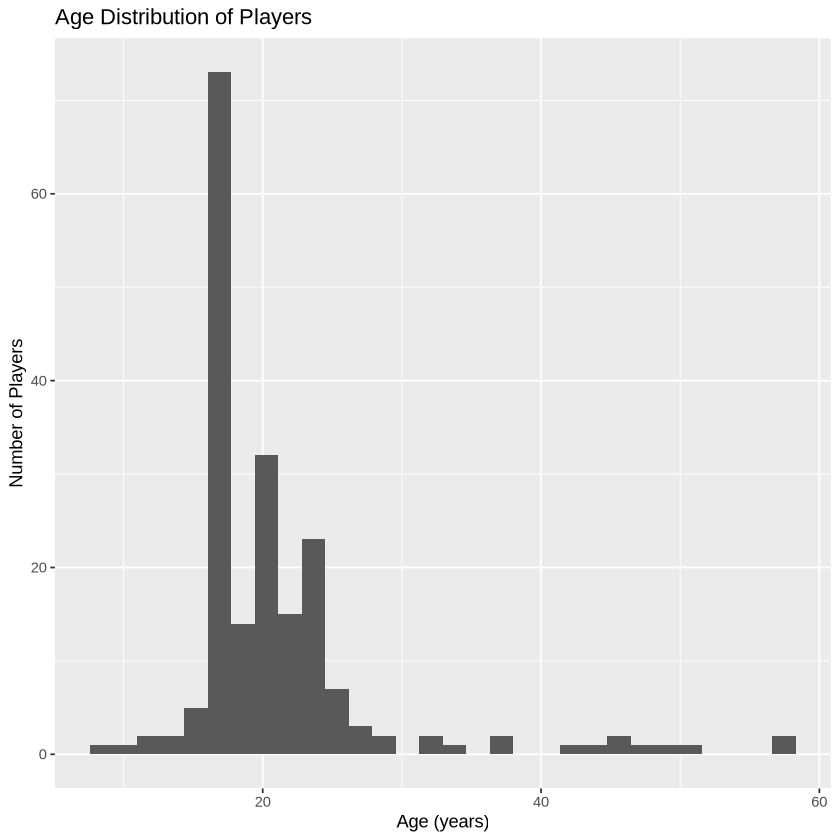

In [5]:
number_of_players_per_age <- ggplot(players, aes(x = Age)) +
geom_histogram() +
labs(title = "Age Distribution of Players",
     x = "Age (years)",
     y = "Number of Players")
number_of_players_per_age

**Insight:**
The majority of the players are between 16–25 years old.

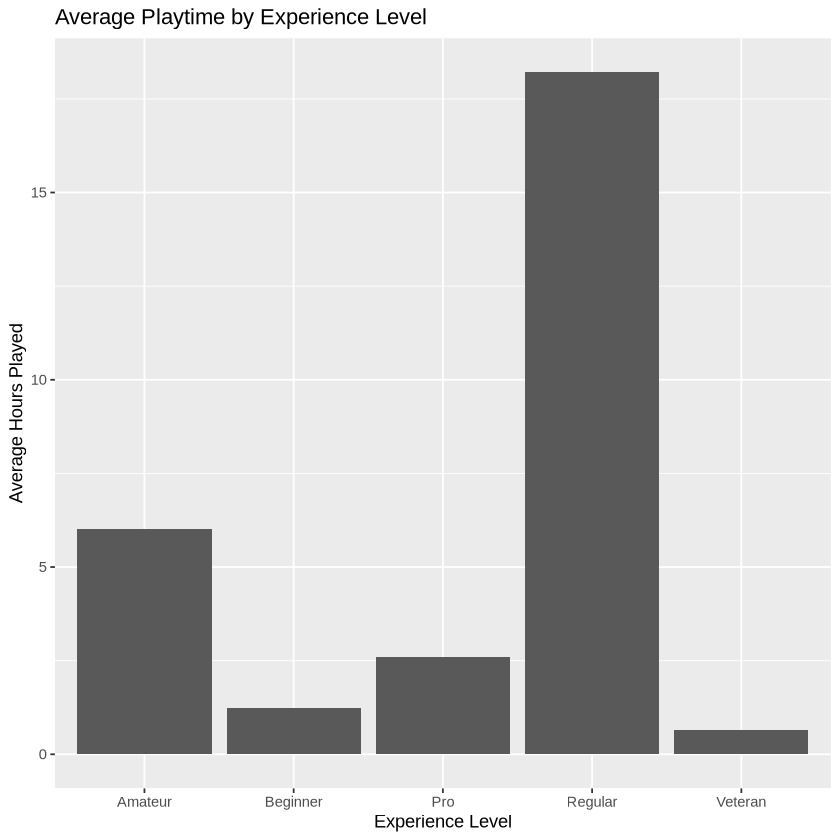

In [6]:
playtime_by_experience <- players |>
group_by(experience) |>
summarize(mean_played_hours = mean(played_hours, na.rm = TRUE)) |>
ggplot(aes(x = experience, y = mean_played_hours)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Playtime by Experience Level",
       x = "Experience Level",
       y = "Average Hours Played")
playtime_by_experience

**Insight:**
Regular players have the highest average playtime, followed by Amateur, Pro, Beginner, and Veteran.
The graph suggests that regular skilled players are the most active group in terms of total hours.

In [7]:
subscription_rate_by_experience <- players |>
  group_by(experience) |>
  summarize(subscription_rate = mean(subscribe, na.rm = TRUE)) |>
  ggplot(aes(x = experience, y = subscription_rate)) +
  geom_bar(stat = "identity") +
  labs(title = "Newsletter Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Proportion Subscribed")
Subscription_rate_by_experience

ERROR: Error in eval(expr, envir, enclos): object 'Subscription_rate_by_experience' not found


**Insight:**
Subscription rates are fairly balanced across all experience levels, but Regular players show the highest proportion of newsletter subscriptions.
This may suggest that regular skilled players are the most engaged group overall, possibly because they are active but not yet saturated or disengaged like some long-term players.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


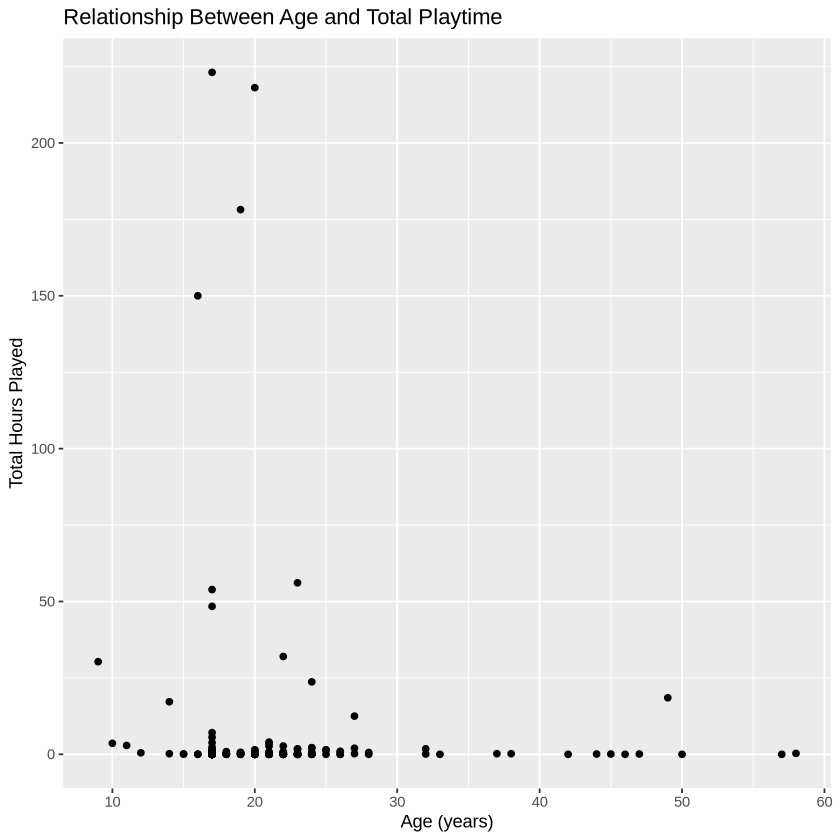

In [8]:
age_and_playtime <- players |>
ggplot(aes(x = Age, y = played_hours)) +
  geom_point() +
  labs(
    title = "Relationship Between Age and Total Playtime",
    x = "Age (years)",
    y = "Total Hours Played")
age_and_playtime

**Insight:**
Most data points are concentrated around age 20. A few of these players also show very high total playtime, above 150 hours, making this age group the most active and engaged overall.
Beyond age 25, playtime levels remain low and scattered, suggesting that younger players are more active on average and that age may have a mild influence on engagement

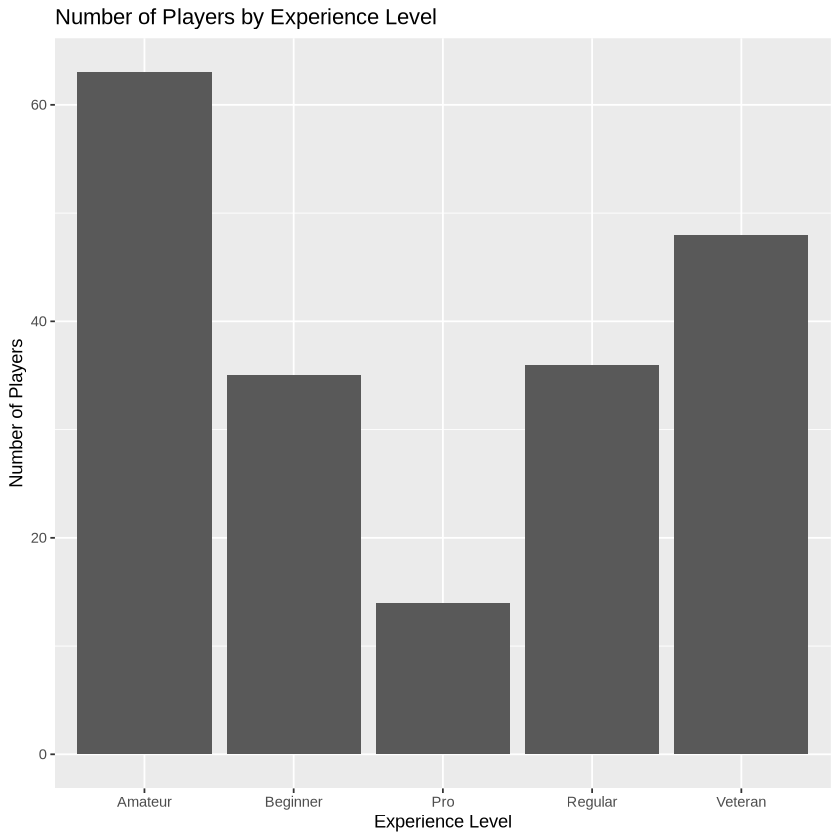

In [10]:
Number_of_players_by_experience <- players |>
ggplot(aes(x = experience)) +
  geom_bar() +
  labs(
    title = "Number of Players by Experience Level",
    x = "Experience Level",
    y = "Number of Players")
Number_of_players_by_experience

**Insight:**
Most players in the dataset are Amateurs, while Pro players are the fewest.
This suggests that the Minecraft research server attracts a majority of mid-level participants who are somewhat experienced but not expert-level.

## 4. Methods and Plan

**Proposed method:** K-Nearest Neighbours (KNN) Classification  

**Reason for choice:**  
The response variable `subscribe` is binary (`TRUE` or `FALSE`), so this is a classification problem.  
KNN is an appropriate and simple classification method already covered in this course.  
It predicts each player's subscription status by comparing their characteristics (`Age`, `experience`, `played_hours`, and `gender`) to those of similar players.

**Assumptions:**  
- Players with similar characteristics tend to have similar outcomes (subscription behaviour).  
- All predictors are measured on comparable scales, so they must be standardized.  
- The data are not extremely imbalanced between subscribers and non-subscribers.


**Limitations:**  
- KNN can be sensitive to outliers and irrelevant predictors.  
- It can become slower with large datasets.  
- It does not explain why a prediction is made — it only relies on distance.  
- Choice of `k` (the number of neighbours) strongly affects performance.

**Model comparison and selection:**  
The best value of `k` will be chosen using **cross-validation** on the training data.  
Performance will be evaluated using:  
- **Accuracy** (overall correctness)  
- **Precision** and **Recall** (how well the model identifies subscribers)  